This code is referenced by https://www.kaggle.com/aikinogard/march-machine-learning-mania-2017/cf-starter-with-keras-0-560136

He treats this problem as a binary classification problem and adds a sigmoid dense layer at the end of the network.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Input, Dense, Dropout, Flatten, Embedding, merge
from keras.regularizers import l2
from keras.optimizers import Adam
from keras.models import Model
%matplotlib inline

Using TensorFlow backend.


In [2]:
dr = pd.read_csv("dataset/RegularSeasonDetailedResults.csv")

In [3]:
dr.head()

,Season,Daynum,Wteam,Wscore,Lteam,Lscore,Wloc,Numot,Wfgm,Wfga,...,Lfga3,Lftm,Lfta,Lor,Ldr,Last,Lto,Lstl,Lblk,Lpf
0,2003,10,1104,68,1328,62,N,0,27,58,...,10,16,22,10,22,8,18,9,2,20
1,2003,10,1272,70,1393,63,N,0,26,62,...,24,9,20,20,25,7,12,8,6,16
2,2003,11,1266,73,1437,61,N,0,24,58,...,26,14,23,31,22,9,12,2,5,23
3,2003,11,1296,56,1457,50,N,0,18,38,...,22,8,15,17,20,9,19,4,3,23
4,2003,11,1400,77,1208,71,N,0,30,61,...,16,17,27,21,15,12,10,7,1,14


In [4]:
dr[dr.Season == 2003].Wteam.nunique()

327

In [5]:
dr.columns

Index([u'Season', u'Daynum', u'Wteam', u'Wscore', u'Lteam', u'Lscore', u'Wloc',
       u'Numot', u'Wfgm', u'Wfga', u'Wfgm3', u'Wfga3', u'Wftm', u'Wfta',
       u'Wor', u'Wdr', u'Wast', u'Wto', u'Wstl', u'Wblk', u'Wpf', u'Lfgm',
       u'Lfga', u'Lfgm3', u'Lfga3', u'Lftm', u'Lfta', u'Lor', u'Ldr', u'Last',
       u'Lto', u'Lstl', u'Lblk', u'Lpf'],
      dtype='object')

In [6]:
len(dr)

71241

In [7]:
simple_df_1 = pd.DataFrame()
simple_df_1[["team1", "team2"]] =dr[["Wteam", "Lteam"]].copy()
simple_df_1["pred"] = 1

simple_df_2 = pd.DataFrame()
simple_df_2[["team1", "team2"]] =dr[["Lteam", "Wteam"]]
simple_df_2["pred"] = 0

simple_df = pd.concat((simple_df_1, simple_df_2), axis=0)
simple_df.head()

,team1,team2,pred
0,1104,1328,1
1,1272,1393,1
2,1266,1437,1
3,1296,1457,1
4,1400,1208,1


* pandas.concat: http://pandas.pydata.org/pandas-docs/stable/generated/pandas.concat.html

In [8]:
len(simple_df)

142482

In [9]:
n = simple_df.team1.nunique()
n

355

In [10]:
trans_dict = {t: i for i, t in enumerate(simple_df.team1.unique())}
simple_df["team1"] = simple_df["team1"].apply(lambda x: trans_dict[x])
simple_df["team2"] = simple_df["team2"].apply(lambda x: trans_dict[x])
simple_df.head()

,team1,team2,pred
0,0,67,1
1,1,164,1
2,2,93,1
3,3,221,1
4,4,110,1


In [11]:
simple_df.team1.tail()

71236    303
71237      1
71238    165
71239     71
71240    269
Name: team1, dtype: int64

In [12]:
train = simple_df.values
np.random.shuffle(train)

In [13]:
def embedding_input(name, n_in, n_out, reg):
    inp = Input(shape=(1,), dtype="int64", name=name)
    return inp, Embedding(n_in, n_out, input_length=1, W_regularizer=l2(reg))(inp)

def create_bias(inp, n_in):
    x = Embedding(n_in, 1, input_length=1)(inp)
    return Flatten()(x)

# NN
* https://keras.io/layers/core/

In [14]:
n_factors = 50

team1_in, t1 = embedding_input("team1_in", n, n_factors, 1e-4)
team2_in, t2 = embedding_input("team2_in", n, n_factors, 1e-4)

b1 = create_bias(team1_in, n)
b2 = create_bias(team2_in, n)

In [15]:
x = merge([t1, t2], mode="dot")
x = Flatten()(x)
x = merge([x, b1], mode="sum")
x = merge([x, b2], mode="sum")
x = Dense(1, activation="sigmoid")(x)
model = Model([team1_in, team2_in], x)
model.compile(Adam(0.001), loss="binary_crossentropy")

In [16]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
team1_in (InputLayer)            (None, 1)             0                                            
____________________________________________________________________________________________________
team2_in (InputLayer)            (None, 1)             0                                            
____________________________________________________________________________________________________
embedding_1 (Embedding)          (None, 1, 50)         17750       team1_in[0][0]                   
____________________________________________________________________________________________________
embedding_2 (Embedding)          (None, 1, 50)         17750       team2_in[0][0]                   
___________________________________________________________________________________________

In [17]:
history = model.fit([train[:, 0], train[:, 1]], train[:, 2], batch_size=64, nb_epoch=10, verbose=2)

Epoch 1/10
12s - loss: 0.6446
Epoch 2/10
12s - loss: 0.6031
Epoch 3/10
11s - loss: 0.5937
Epoch 4/10
11s - loss: 0.5898
Epoch 5/10
11s - loss: 0.5881
Epoch 6/10
11s - loss: 0.5872
Epoch 7/10
11s - loss: 0.5866
Epoch 8/10
12s - loss: 0.5862
Epoch 9/10
12s - loss: 0.5859
Epoch 10/10
11s - loss: 0.5856


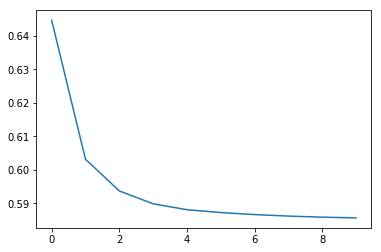

In [18]:
plt.plot(history.history["loss"])
plt.show()

In [19]:
sub = pd.read_csv("dataset/sample_submission.csv")
sub["team1"] = sub["id"].apply(lambda x: trans_dict[int(x.split("_")[1])])
sub["team2"] = sub["id"].apply(lambda x: trans_dict[int(x.split("_")[2])])
sub.head()

,id,pred,team1,team2
0,2013_1103_1107,0.5,230,294
1,2013_1103_1112,0.5,230,97
2,2013_1103_1125,0.5,230,13
3,2013_1103_1129,0.5,230,190
4,2013_1103_1137,0.5,230,192


In [20]:
sub["pred"] = model.predict([sub.team1, sub.team2])
sub = sub[["id", "pred"]]
sub.head()

,id,pred
0,2013_1103_1107,0.687173
1,2013_1103_1112,0.177935
2,2013_1103_1125,0.575055
3,2013_1103_1129,0.436309
4,2013_1103_1137,0.749593


In [21]:
sub.to_csv("CF.csv", index=False)